# Sentinel-2 image clustering in python


## Step-by-step tutorial on how to perform unsupervised classification using scikit-learn and rasterio in python

In [1]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import numpy as np

## Training

In [172]:
# Open the image 
elhas_raster = rio.open("Elhasaheesa.tif")

print(elhas_raster.meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 10433, 'height': 8530, 'count': 3, 'crs': CRS.from_epsg(32636), 'transform': Affine(10.0, 0.0, 442800.0,
       0.0, -10.0, 1680230.0)}


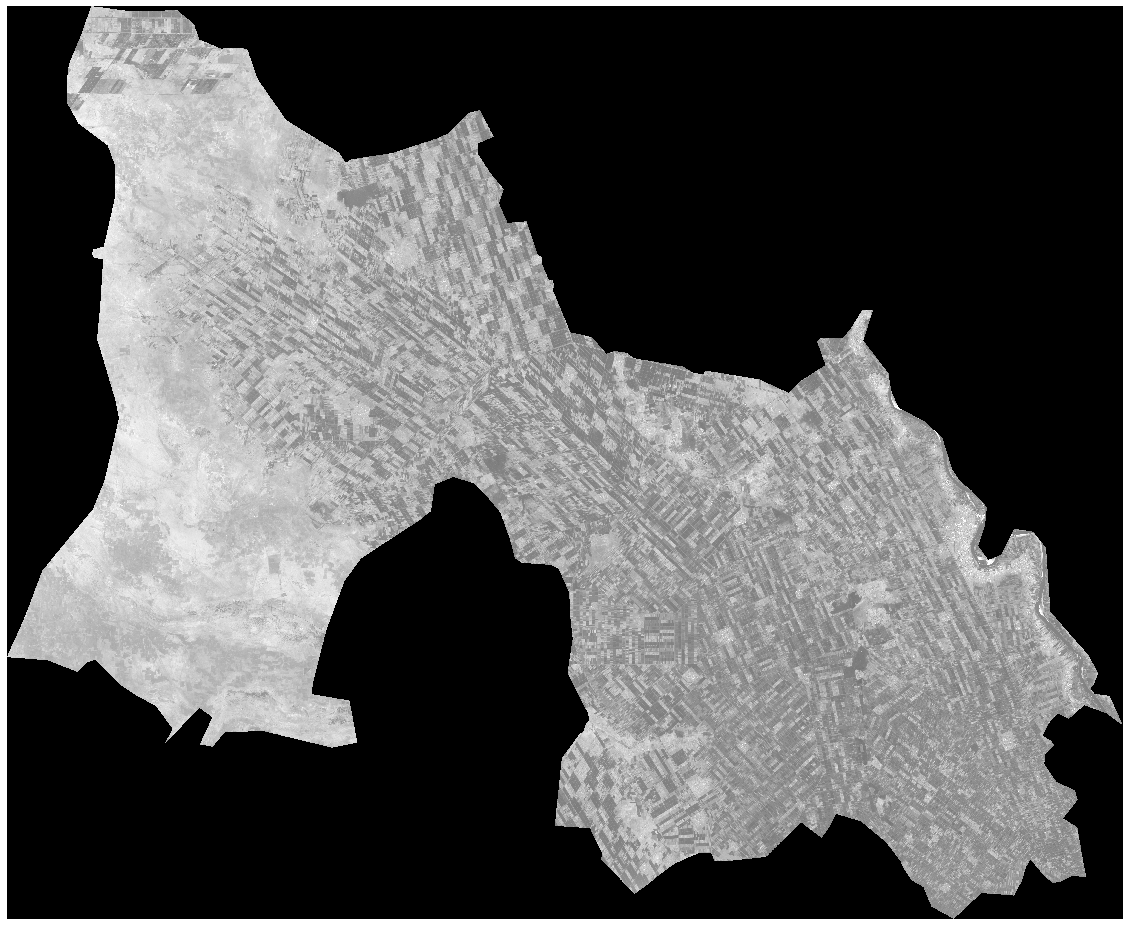

In [176]:
# Read, enhance and show the image
elhas_arr = elhas_raster.read()
vmin, vmax = np.nanpercentile(elhas_arr, (5,95))  # 5-95% contrast stretch

fig, ax = plt.subplots(figsize=[20,20], ncols=1,nrows=1)
show(elhas_raster, cmap='gray', vmin=vmin, vmax=vmax, ax=ax)
ax.set_axis_off()
fig.savefig("elhas.jpg", bbox_inches='tight')
plt.show()

In [162]:
# print the shape of the original image
elhas_arr.shape

(3, 8530, 10433)

In [148]:
# create an empty array with same dimension and data type
imgxyb = np.empty((elhas_raster.height, elhas_raster.width, elhas_raster.count), elhas_raster.meta['dtype'])

In [149]:
imgxyb.shape

(8530, 10433, 3)

In [150]:
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = elhas_raster.read(band+1)

In [151]:
print(imgxyb.shape)

(8530, 10433, 3)

In [153]:
# convet to 1d array
img1d = imgxyb[:,:,:3].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))

In [154]:
img1d.shape

(88993490, 3)

In [20]:
# create an object of the classifier and train it
cl = cluster.KMeans(n_clusters=4)
param = cl.fit(img1d)

In [21]:
cl.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [22]:
# get the labels of the classes and reshape it x-y-bands shape order (one band only)
img_cl = cl.labels_
img_cl = img_cl.reshape(imgxyb[:,:,0].shape)

In [23]:
img_cl.shape

(8530, 10433)

In [111]:
# Create a custom color map to represent our different 4 classes
cmap = mc.LinearSegmentedColormap.from_list("", ["black","red","green","yellow"])

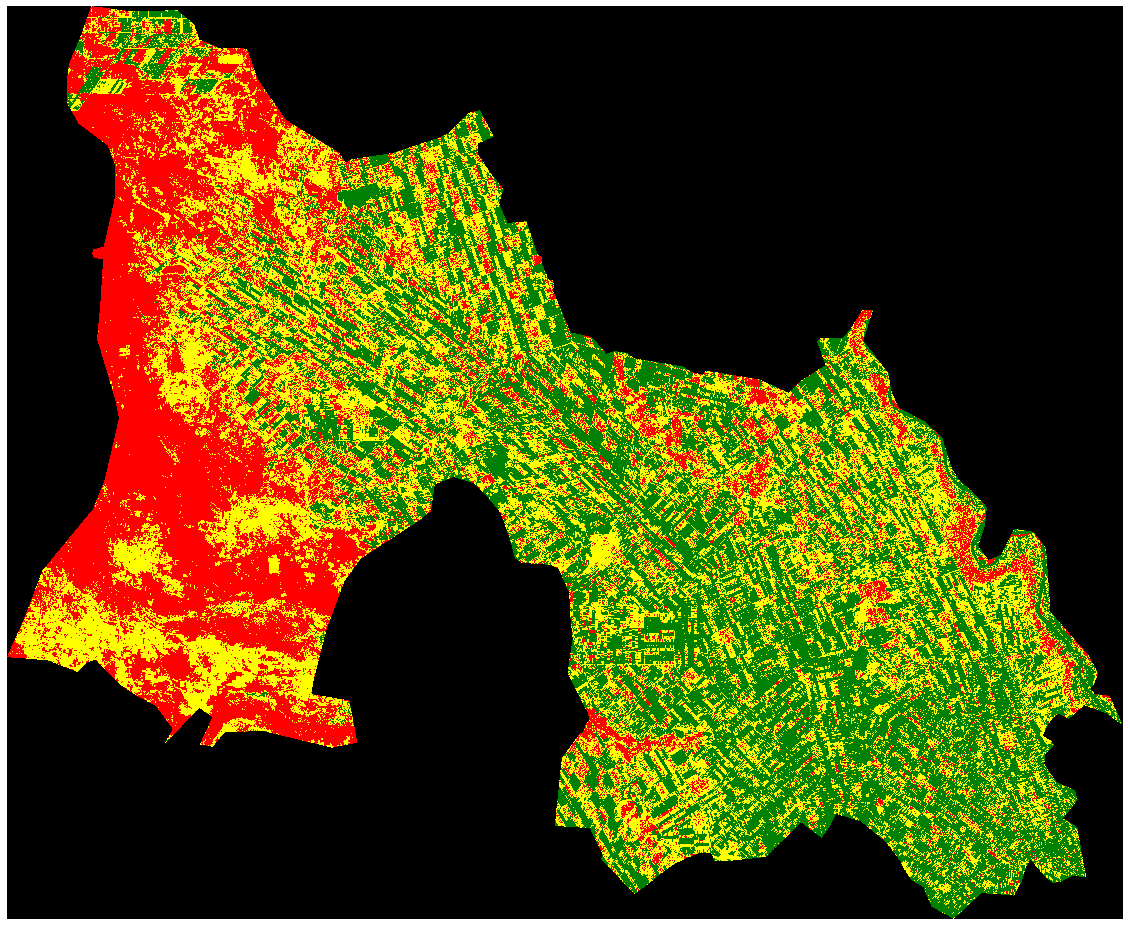

In [179]:
# Show the resulting array and save it as jpg image
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig("elhas_clustered.jpg", bbox_inches='tight')
plt.show()


## Prediction:

In [87]:
# open the raster image
elmanagel = rio.open('elmanagel.tif')

In [170]:
# Read, enhance and show the image
elman_arr = elmanagel.read()
vmin, vmax = np.nanpercentile(elman_arr, (5,95))  # 5-95% contrast stretch

In [94]:
# print meta data
elmanagel.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 10065,
 'height': 13770,
 'count': 3,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(10.0, 0.0, 429950.0,
        0.0, -10.0, 1636210.0)}

In [91]:
# create an empty array with same dimensions and data type 
elman_xyb = np.empty((elmanagel.height, elmanagel.width,elmanagel.count), elmanagel.meta['dtype'])

In [92]:
# loop through the raster bands and fill the empty array in x-y-bands order
for band in range(elman_xyb.shape[2]):
    elman_xyb[:,:,band] = elmanagel.read(band+1)

In [95]:
# convert to 1d array
elman_1d = elman_xyb[:,:,:3].reshape(elman_xyb.shape[0]*elman_xyb.shape[1], elman_xyb.shape[2])

In [96]:
elman_1d.shape

(138595050, 3)

In [99]:
# predict the clusters in the image 
pred = cl.predict(elman_1d)

In [101]:
# reshape the 1d array predictions to x-y-bands shape order (only one band)
elman_cul = pred
elman_cul = elman_cul.reshape(elman_xyb[:,:,0].shape)

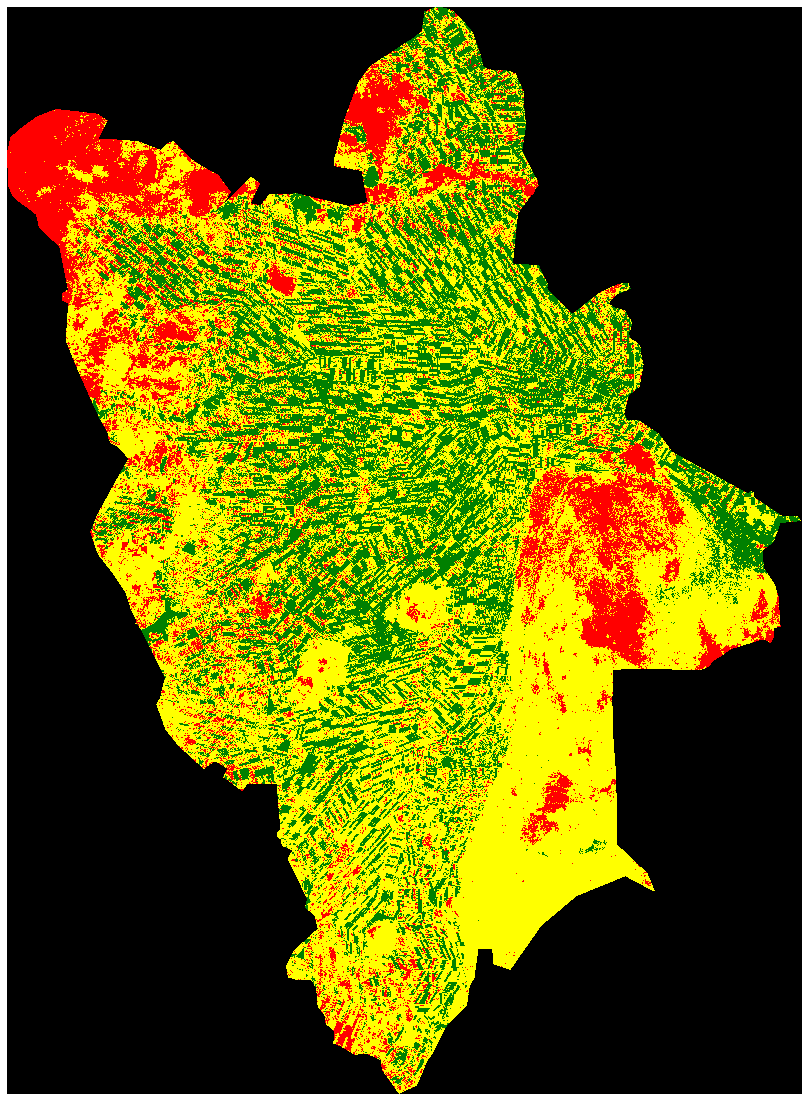

In [167]:
# show the predicted results
plt.figure(figsize=[20,20])
plt.imshow(elman_cul, cmap=cmap)
plt.axis('off')
plt.savefig("elman_cul.jpg", bbox_inches='tight')
plt.show()

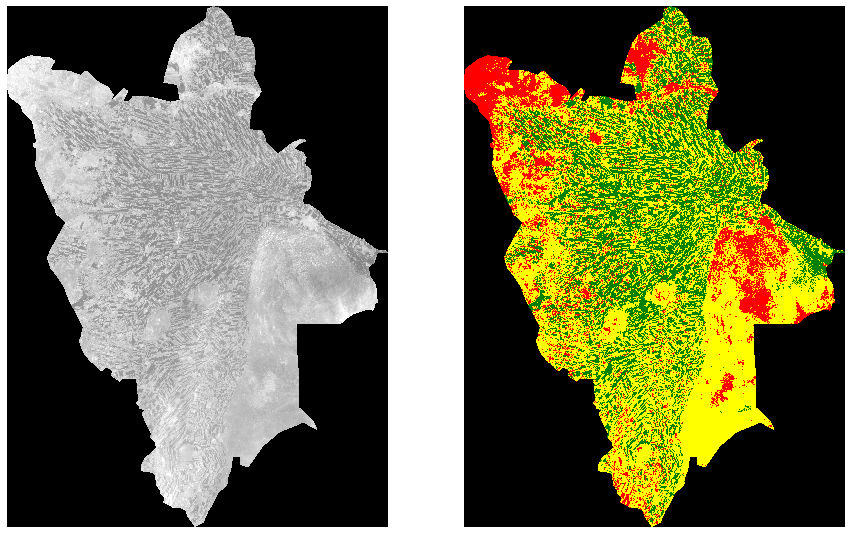

In [171]:
# show the original and predicted image
fig, (ax1,ax2) = plt.subplots(figsize=[15,15], nrows=1,ncols=2, sharey=False,)
show(elmanagel, cmap='gray', vmin=vmin, vmax=vmax, ax=ax1)
show(elman_cul, cmap=cmap, ax=ax2)
ax1.set_axis_off()
ax2.set_axis_off()
fig.savefig("pred.png", bbox_inches='tight')
plt.show()